       n  tiempo_merge  tiempo_quick
0   5000      0.000175      0.000095
1  10000      0.000393      0.000231
2  15000      0.000907      0.000431
3  20000      0.001307      0.000748
4  25000      0.001358      0.001035

Filas: 20


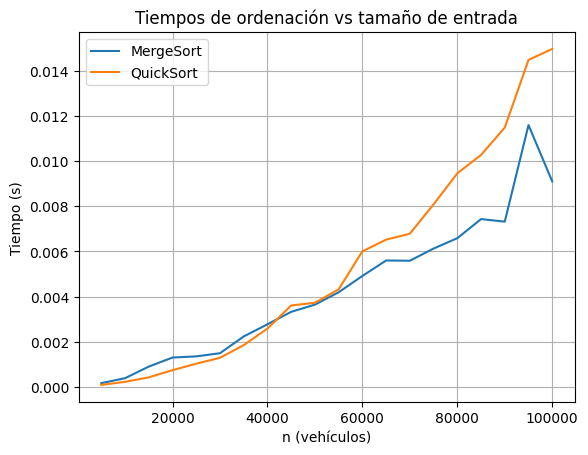

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Cambia esto si tu archivo está en otra ruta
path = Path("../tiempos.txt")

if not path.exists():
    raise FileNotFoundError(f"No existe {path.resolve()}. ")

# Leer líneas no vacías
lines = [ln.strip() for ln in path.read_text(encoding="utf-8").splitlines() if ln.strip()]

if len(lines) % 3 != 0:
    raise ValueError(
        f"El archivo debe tener múltiplos de 3 líneas (n, tiempo_merge, tiempo_quick). "
        f"Encontré {len(lines)} líneas."
    )

data = []
for i in range(0, len(lines), 3):
    n = int(lines[i])
    t_merge = float(lines[i + 1])
    t_quick = float(lines[i + 2])
    data.append({"n": n, "tiempo_merge": t_merge, "tiempo_quick": t_quick})

df = pd.DataFrame(data).sort_values("n").reset_index(drop=True)
print(df.head())
print("\nFilas:", len(df))

# Graficar
plt.figure()
plt.plot(df["n"], df["tiempo_merge"], label="MergeSort")
plt.plot(df["n"], df["tiempo_quick"], label="QuickSort")
plt.xlabel("n (vehículos)")
plt.ylabel("Tiempo (s)")
plt.title("Tiempos de ordenación vs tamaño de entrada")
plt.legend()
plt.grid(True)
plt.show()
